<a href="https://colab.research.google.com/github/aliahalotaibi73/week5_exercises/blob/main/Time_Series_Forecasting_Practice_Aliah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Practice Exercise

In this practice exercise, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in the `Datasets` file with the name `Aquifer_Petrignano` the target is to predict `Depth_to_Groundwater_P24` column.

## Dataset: Aquifer Petrignano

### Dataset Overview:

- **Name**: Aquifer Petrignano
- **Description**: This dataset contains time series data related to groundwater levels, rainfall, temperature, and hydrometry in the Aquifer Petrignano region. The data is collected over multiple years, capturing various environmental measurements. It is particularly useful for modeling groundwater levels, climate analysis, and time series forecasting.
- **Time Period**: Starting from 14/03/2006
- **Frequency**: Daily observations

### Features:

1. **Date**: The date of the observation in `DD/MM/YYYY` format.
2. **Rainfall_Bastia_Umbra**: Daily rainfall measurement in the Bastia Umbra region (mm).
3. **Depth_to_Groundwater_P24**: Depth to groundwater at observation point P24 (meters).
4. **Depth_to_Groundwater_P25**: Depth to groundwater at observation point P25 (meters).
5. **Temperature_Bastia_Umbra**: Daily temperature in the Bastia Umbra region (°C).
6. **Temperature_Petrignano**: Daily temperature in the Petrignano region (°C).
7. **Volume_C10_Petrignano**: Water volume measured at station C10 in Petrignano (m³).
8. **Hydrometry_Fiume_Chiascio_Petrignano**: Hydrometry measurements of the Fiume Chiascio river in Petrignano (m).


## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use seasonal_decompose from the statsmodels library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [ ]:
df = pd.read_csv('Aquifer_Petrignano.csv', parse_dates=['Date'],index_col=['Date'])
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,28/07/2009,0.0,-28.90,-28.12,27.4,25.6,-34833.888,1.9
1,21/06/2015,0.0,-20.79,-20.45,20.8,0.0,-18681.408,0.0
2,10/10/2019,0.0,-27.36,-26.75,20.3,20.0,-28288.224,2.3
3,09/12/2011,0.0,-27.78,-26.98,9.2,8.8,-37215.072,2.0
4,20/09/2011,1.0,-26.09,-25.55,15.7,15.7,-30856.896,2.0


In [ ]:
dd = df.drop(['Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra', 'Temperature_Petrignano',
              'Volume_C10_Petrignano', 'Hydrometry_Fiume_Chiascio_Petrignano'], axis=1)

* we should to convert Date type to date time

In [ ]:
# first we should to convert date type to datetime
#dd['Date'] = pd.to_datetime(dd['Date'])

<ipython-input-158-ffe179987380>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dd['Date'] = pd.to_datetime(dd['Date'])


In [ ]:
# set the date to be index because it an important step in time serise
#dd.set_index('Date', inplace=True)

In [ ]:
dd.sort_index(inplace=True)

In [ ]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5223 entries, 2006-03-14 to 2020-06-30
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rainfall_Bastia_Umbra     4199 non-null   float64
 1   Depth_to_Groundwater_P24  5168 non-null   float64
dtypes: float64(2)
memory usage: 122.4 KB


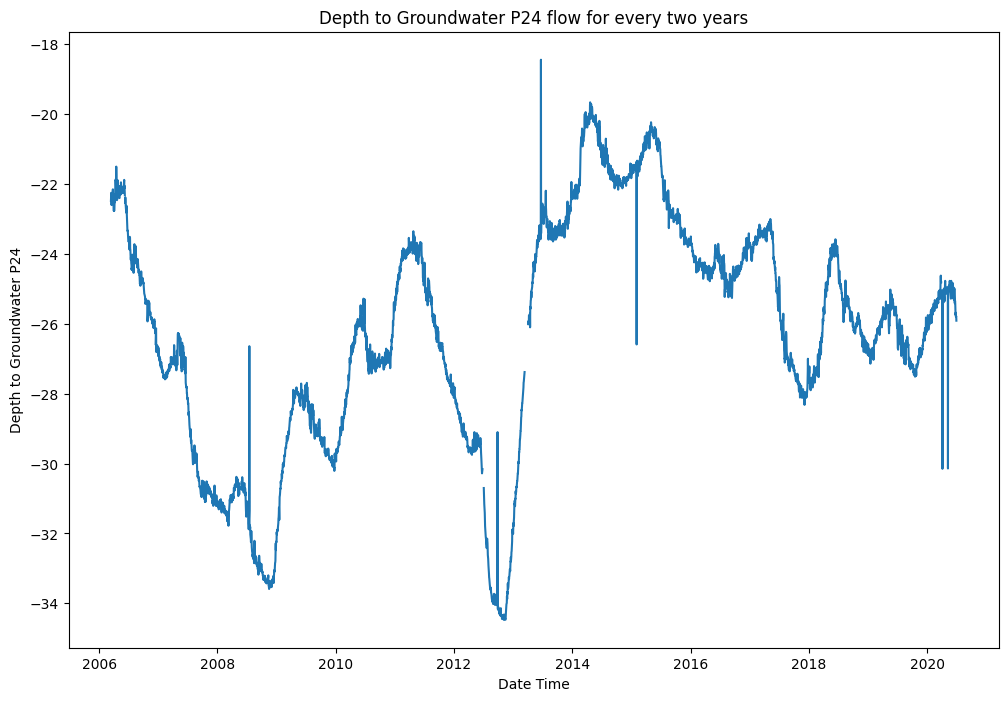

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(dd['Depth_to_Groundwater_P24'])
plt.title('Depth to Groundwater P24 flow for every two years')
plt.xlabel('Date Time')
plt.ylabel('Depth to Groundwater P24')
plt.show()

In [ ]:
Missing_values = dd.isnull().sum().sum()
print("MIssing Valuse count:", Missing_values)

MIssing Valuse count: 1079


In [ ]:
dd.shape

(5223, 2)

In [ ]:
dd.duplicated().sum()

2569

In [ ]:
dd.drop_duplicates(inplace=True)

In [ ]:
dd.duplicated().sum()

0

In [ ]:
 dd.isnull().sum()

,0
Rainfall_Bastia_Umbra,553
Depth_to_Groundwater_P24,12


In [ ]:
# to handel missing values I will use fillna and mean
dd['Rainfall_Bastia_Umbra'].fillna(dd['Rainfall_Bastia_Umbra'].mean(), inplace=True)
dd['Depth_to_Groundwater_P24'].fillna(dd['Depth_to_Groundwater_P24'].mean(),  inplace=True)

In [ ]:
dd.isnull().sum()

,0
Rainfall_Bastia_Umbra,0
Depth_to_Groundwater_P24,0
MA_8,0
Depth_to_Groundwater_P24_Diff,0


* to use seasonal_decompose we should handle zero and negative values because this function requires the input data to be positive because some of its underlying methods.
* instide of handle zero and negative values I will use Additive Model.

In [ ]:
result = seasonal_decompose(dd['Depth_to_Groundwater_P24'],
                            model ='additive', period=365)
#multiplicative

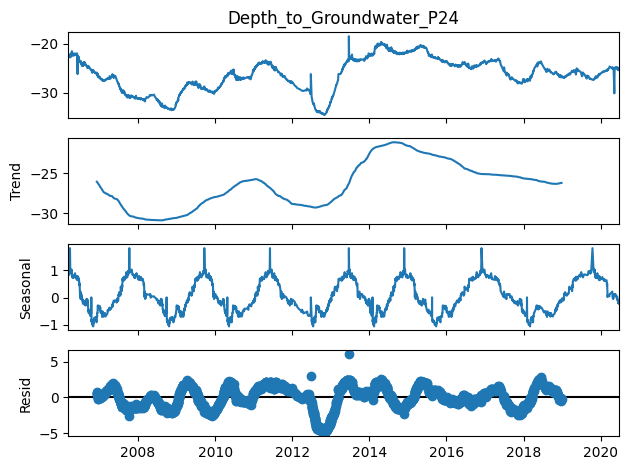

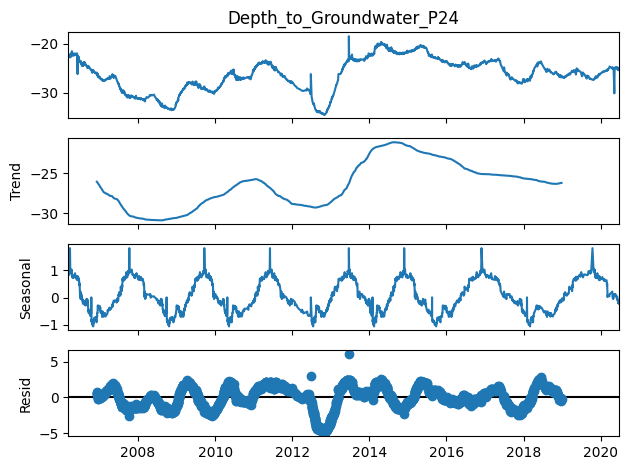

In [ ]:
result.plot()

In [ ]:
dd.describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall_Bastia_Umbra,2654.0,2.456029,6.392914,0.00000,0.0000,0.000000,1.1750,67.30
Depth_to_Groundwater_P24,2654.0,-26.186851,3.558446,-34.47000,-28.5075,-25.870000,-23.5900,-18.44
MA_8,2654.0,-26.124046,3.793064,-34.42875,-28.5225,-25.871875,-23.6125,0.00
Depth_to_Groundwater_P24_Diff,2654.0,-0.001085,0.301608,-5.14000,-0.0800,-0.010000,0.0800,5.21


## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

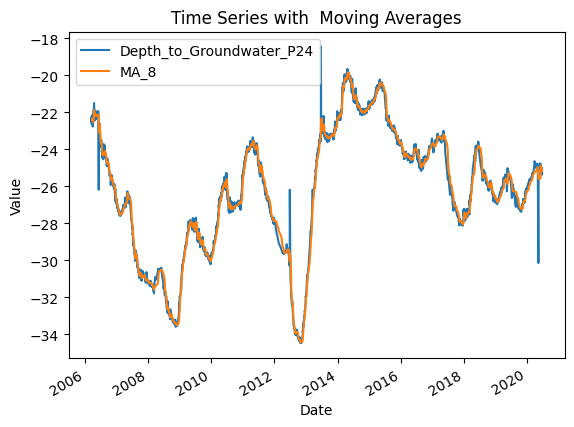

In [ ]:
# I choose to create moving averages with target column to reduce noise, moving averages means analyze and smooth out fluctuations in time series dataset.

dd['MA_8'] = dd['Depth_to_Groundwater_P24'].rolling(window=8).mean()

dd[['Depth_to_Groundwater_P24', 'MA_8']].plot()
plt.title('Time Series with  Moving Averages')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `Prev_Depth_to_Groundwater_P24`, which represents the previous day's groundwater depth. This helps capture the effect of past values on current observations.

- **Date Features**: Extract meaningful time-based features from the `Date` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.
  - **IsWeekend**: A binary feature that distinguishes between weekdays and weekends.
  - **Difference between Depth_to_Groundwater_P24**: Calculate the difference between consecutive values in the `Depth_to_Groundwater_P24` column to highlight short-term changes in groundwater depth.

In [ ]:
# Calculate the day-to-day difference in Depth_to_Groundwater_P24
dd['Depth_to_Groundwater_P24_Diff'] = dd['Depth_to_Groundwater_P24'] - dd['Depth_to_Groundwater_P24'].shift(1)

In [ ]:
#df['Difference'] = df['Value'].diff()

In [ ]:
dd.head()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,MA_8,Depth_to_Groundwater_P24_Diff
Date,,,,
2006-03-14,0.0,-22.48,NaN,NaN
2006-03-15,0.0,-22.38,NaN,0.10
2006-03-16,0.0,-22.25,NaN,0.13
2006-03-18,0.0,-22.60,NaN,-0.35
2006-03-19,0.0,-22.35,NaN,0.25


In [ ]:
dd = dd.fillna(0)

In [ ]:
dd.isnull().sum().sum()

0

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [ ]:
#In time series we should convert the dataset to array because it will enhance Performance and Efficiency
dd.values

array([[  0.    , -22.48  ,   0.    ,   0.    ],
       [  0.    , -22.38  ,   0.    ,   0.1   ],
       [  0.    , -22.25  ,   0.    ,   0.13  ],
       ...,
       [  0.2   , -25.04  , -25.095 ,   0.29  ],
       [  0.8   , -25.19  , -25.1275,  -0.15  ],
       [  0.6   , -25.36  , -25.1575,  -0.17  ]])

In [ ]:
train_size = int(len(dd) * 0.8)
train_data = dd.iloc[:train_size]
test_data = dd.iloc[train_size:]

In [ ]:
train_data.shape

(2123, 4)

In [ ]:
test_data.shape

(531, 4)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [ ]:
# Prepare the data for LSTM
def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0:dataset.shape[1]]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [ ]:
import numpy as np

In [ ]:
X_train, Y_train = create_dataset(train_data_scaled, 12)
X_test, Y_test = create_dataset(test_data_scaled, 12)

In [ ]:
Y_train.shape , X_train.shape , X_test.shape , Y_test.shape

((2110,), (2110, 12, 4), (518, 12, 4), (518,))

In [ ]:
# Reshape the data for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], train_data_scaled.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], test_data_scaled.shape[1])

In [ ]:
Y_train.shape , X_train.shape , X_test.shape , Y_test.shape

((2110,), (2110, 12, 4), (518, 12, 4), (518,))

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU

In [ ]:
# LSTM

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(12, 4)))
model.add(LSTM(64))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [ ]:
# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0104 - val_loss: 0.0211
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0067 - val_loss: 0.0213
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0050 - val_loss: 0.0199
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0055 - val_loss: 0.0183
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0078 - val_loss: 0.0190
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0065 - val_loss: 0.0192
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0070 - val_loss: 0.0183
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0066 - val_loss: 0.0180
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0054 - val_loss: 0.0186
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0046 - val_loss: 0.0184


### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
predictions_1 = model.predict(X_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, predictions_1)
print('Test Score: %.2f RMSE' % (mae))

Test Score: 0.08 RMSE


### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [ ]:
#GRU

modelGRU = Sequential()
modelGRU.add(GRU(128, activation='relu',return_sequences=True, input_shape=(12, 4)))
modelGRU.add(GRU(128, activation='relu'))
modelGRU.add(Dense(1))


modelGRU.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
modelGRU.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0074 - val_loss: 0.0203
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0061 - val_loss: 0.0213
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0057 - val_loss: 0.0196
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0066 - val_loss: 0.0185
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0071 - val_loss: 0.0188
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0070 - val_loss: 0.0186
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0063 - val_loss: 0.0190
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0058 - val_loss: 0.0188
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0051 - val_loss: 0.0177
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0065 - val_loss: 0.0189


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
predictions_2 = model.predict(X_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:
mae = mean_absolute_error(Y_test, predictions_2)
print('Test Score: %.2f RMSE' % (mae))

Test Score: 0.08 RMSE


## Conclusion and Interpretation

Write your conclusions based on the model's performance and the forecast.

**Instructions:**
- Interpret the results and discuss the effectiveness of your model.
- Suggest potential improvements.

In [ ]:
Y_test.shape

(518,)

In [ ]:
predictions_2.shape

(518, 1)

In [ ]:
Y_test_rescaled = scaler.inverse_transform(np.concatenate((Y_test.reshape(-1, 1), np.zeros((Y_test.shape[0], 3))), axis=1))[:, 0]
#LSTM Inverse
predictions_rescaled_LSTM = scaler.inverse_transform(np.concatenate((predictions_1, np.zeros((predictions_1.shape[0], 3))), axis=1))[:, 0]
#GRU
predictions_rescaled_GRU = scaler.inverse_transform(np.concatenate((predictions_2, np.zeros((predictions_2.shape[0], 3))), axis=1))[:, 0]

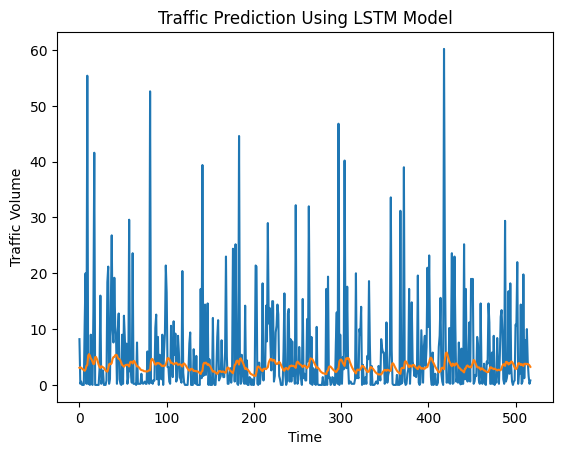

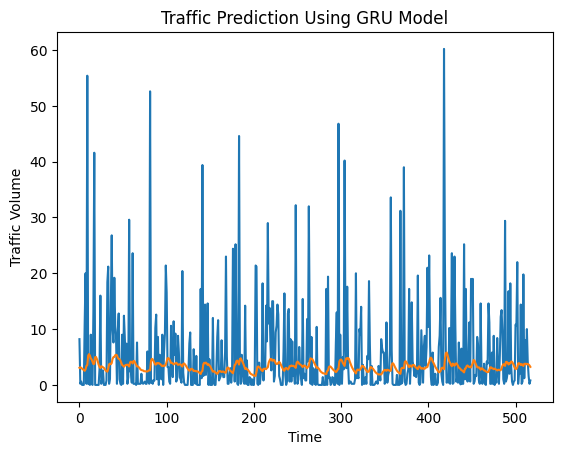

In [ ]:
#LSTM
plt.plot(Y_test_rescaled, label='True Traffic')
plt.plot(predictions_rescaled_LSTM , label='Predicted Traffic')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Traffic Prediction Using LSTM Model')
plt.show()

#GRU
plt.plot(Y_test_rescaled, label='True Traffic')
plt.plot(predictions_rescaled_GRU , label='Predicted Traffic')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Traffic Prediction Using GRU Model')
plt.show()